# Model Development:

In this notebook, the model development steps will be conducted. We first start by a 1-fold training with base parameter values and the full dataset to have a baseline. From that, we develop k-fold cross validation to tune the desired hyperparameters and further on evaluate the results from the best obtained model.

In [1]:
from utils import *
import pandas as pd
import subprocess
from sklearn.model_selection import train_test_split

In [2]:
# run the Python script "unzip_image_folder.py"
subprocess.run(['python', 'unzip_image_folder.py'])

CompletedProcess(args=['python', 'unzip_image_folder.py'], returncode=0)

In [3]:
# Import the train_val and test metadata
if os.path.exists('train_val.csv') and os.path.exists('test.csv'):
    train_val_df = pd.read_csv('train_val.csv')
    test_df = pd.read_csv('test.csv')
else:
    df_imgs = prepare_datafile('image_metadata.csv', 'data')
    train_val_df, test_df = train_test_split(df_imgs, train_size=0.8)
    train_val_df.to_csv('train_val.csv', index=False)
    test_df.to_csv('test.csv', index=False)

In [4]:
train_val_df.head()

,choice,image
0,Food,data/1304913.jpg
1,No-Food,data/1186870.jpg
2,Food,data/252757.jpg
3,Food,data/1090959.jpg
4,Food,data/4600865.jpg


In [5]:
test_df.head()

,choice,image
0,No-Food,data/4825827.jpg
1,No-Food,data/1421871.jpg
2,Food,data/2249070.jpg
3,Food,data/435466.jpg
4,Food,data/1871554.jpg


The code 'hyperparameter_tuning.py' was ran in Google Colab, due to the availability of a GPU in that environment. The complete hyperparameter tuning couldn't be complete due to running out of computing time using the Colab GPU, but from the trials that were ran, very good results were obtained with the following hyperparameters:

- lr: 0.01
- optimizer: Adam
- num_epochs: 14
- L2: 0.1
- batch_size: 100

Those values will be used now in this notebook to validate and evaluate the model.

In [6]:
train_df, val_df = train_test_split(train_val_df, train_size=0.8)

In [7]:
model = ImageClassifier(
    train_df=train_df,
    val_df=val_df,
    test_df=test_df,
    params={
        'lr': 0.01,
        'optimizer': 'Adam',
        'L2': 0.1
    }
)

In [8]:
if os.path.exists('best_tuned_model.pth'):
    model.load('best_tuned_model.pth')
else:
    model.train(batch_size=100, num_epochs = 14, model_save_path='best_tuned_model.pth')

In [9]:
model.test() 

Test: Loss: 0.0208, Test Accuracy: 1.0000, Test AUC: 1.0000


In [18]:
model.best_threshold

0.7000000000000001

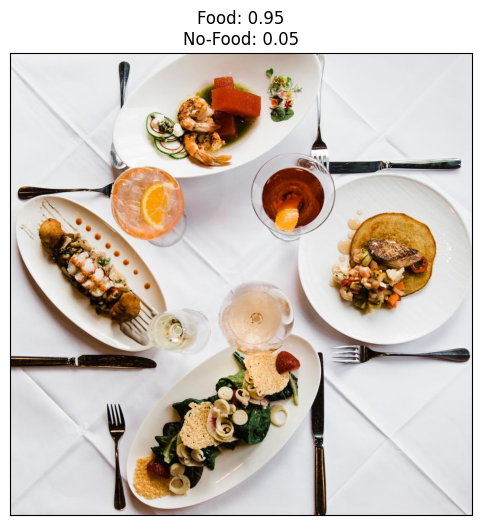

In [10]:
model.show_test_pred()

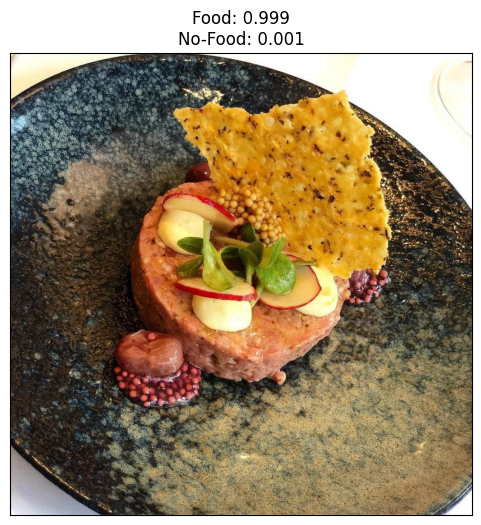

In [11]:
model.show_test_pred()

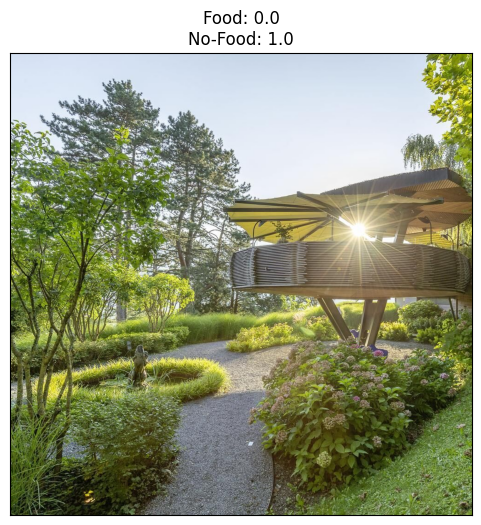

In [12]:
model.show_test_pred()

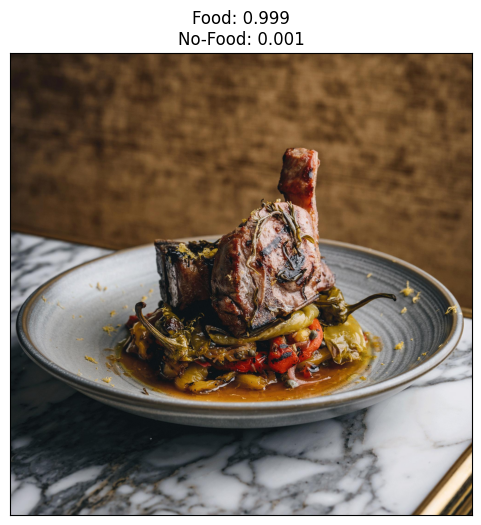

In [13]:
model.show_test_pred()

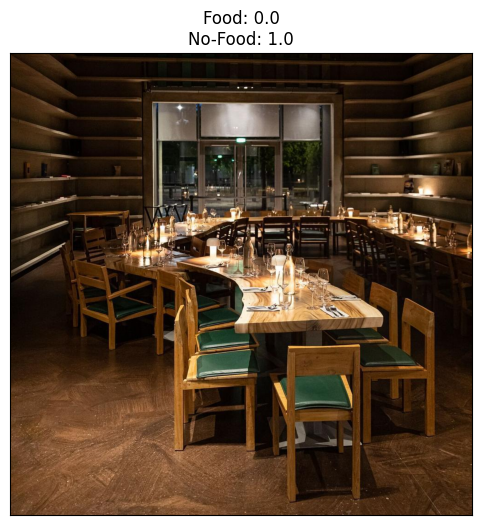

In [14]:
model.show_test_pred()

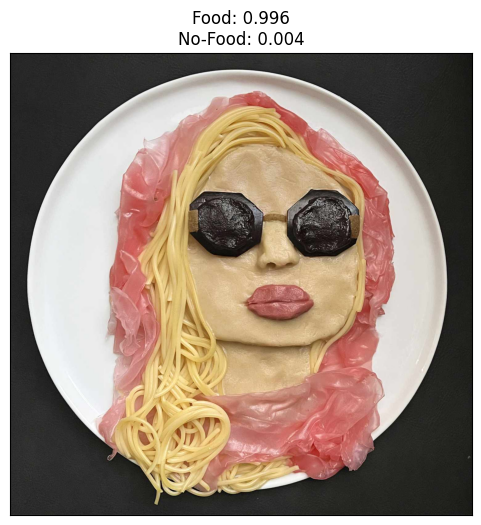

In [15]:
model.show_test_pred('hard_img_tests/food_shape_human.jpg')

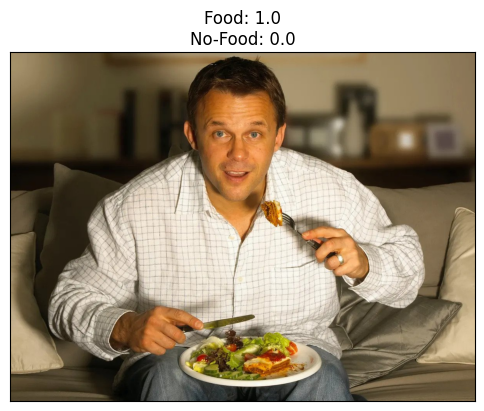

In [16]:
model.show_test_pred('hard_img_tests/someone_eating.jpg')

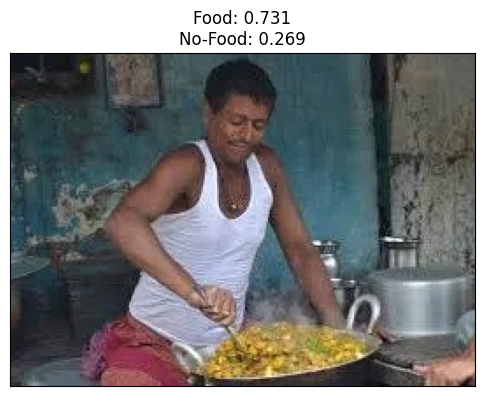

In [17]:
model.show_test_pred('hard_img_tests/someone_cooking_low_res.jpg')